In [4]:
import pandas as pd
from google.colab import drive

In [5]:
# Menggunakan code ini, kita dapat me-mount Google Drive ke dalam lingkungan Colab atau Jupyter Notebook.
# Ini memungkinkan akses langsung ke file dan folder di Google Drive dalam sesi notebook.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Ganti 'nama_file.csv' dengan nama file CSV Anda
file_path = '/content/drive/MyDrive/Mall_Customers.csv'

# Baca file CSV menjadi dataframe
df = pd.read_csv(file_path)

# Tampilkan lima baris pertama dari dataframe
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Mengganti nama atribut/kolom
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

# Tampilkan DataFrame yang sudah diubah
print(df)

     CustomerID  Gender  Age  Annual Income  Spending Score
0             1    Male   19             15              39
1             2    Male   21             15              81
2             3  Female   20             16               6
3             4  Female   23             16              77
4             5  Female   31             17              40
..          ...     ...  ...            ...             ...
195         196  Female   35            120              79
196         197  Female   45            126              28
197         198    Male   32            126              74
198         199    Male   32            137              18
199         200    Male   30            137              83

[200 rows x 5 columns]


In [8]:
df = df.drop (['CustomerID', 'Gender'], axis=1)

print (df.head())

   Age  Annual Income  Spending Score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

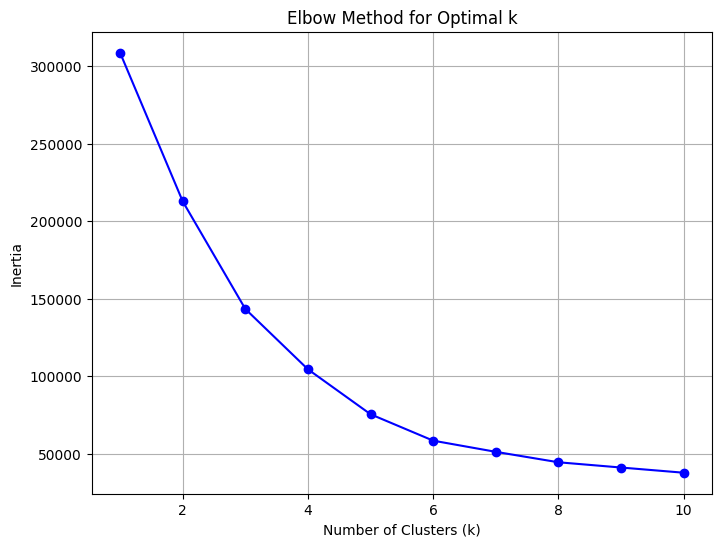

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menginisialisasi list untuk nilai inersia (inertia)
inertia = []

# Melakukan iterasi untuk jumlah cluster dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Membuat plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


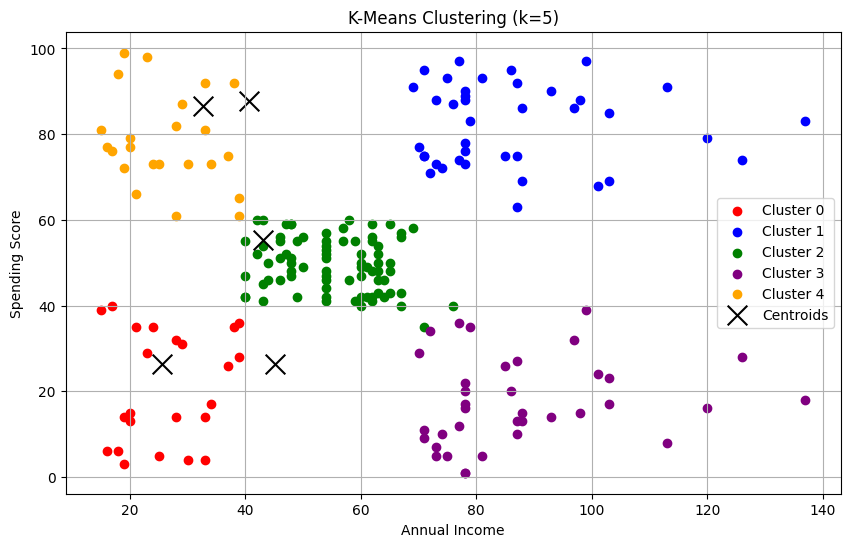

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mengganti nama kolom pada DataFrame
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

# Mengambil kolom yang akan digunakan
data = df[['Age', 'Annual Income', 'Spending Score']]

# Membuat model K-Means dengan jumlah cluster 5
kmeans = KMeans(n_clusters=5, random_state=0)

# Melakukan klustering
df['label'] = kmeans.fit_predict(data)

# Visualisasi berdasarkan label kluster
plt.figure(figsize=(10, 6))

# Visualisasi kluster menggunakan scatter plot
colors = ['red', 'blue', 'green', 'purple', 'orange']
for label, color in enumerate(colors):
    cluster_data = df[df['label'] == label]
    plt.scatter(cluster_data['Annual Income'], cluster_data['Spending Score'], c=color, label=f'Cluster {label}')

# Menampilkan pusat kluster
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=200, label='Centroids')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering (k=5)')
plt.legend()
plt.grid()
plt.show()


In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Mengambil kolom yang akan digunakan
data = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi list untuk menyimpan Silhouette Score
silhouette_scores = []

# Menghitung Silhouette Score untuk k=2 hingga k=10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan hasil Silhouette Score
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette Score for k={k}: {score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.2932
Silhouette Score for k=3: 0.3839
Silhouette Score for k=4: 0.4055
Silhouette Score for k=5: 0.4443
Silhouette Score for k=6: 0.4523
Silhouette Score for k=7: 0.4413
Silhouette Score for k=8: 0.4281
Silhouette Score for k=9: 0.4013
Silhouette Score for k=10: 0.3791


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Inisialisasi list untuk menyimpan Davies-Bouldin Index score
dbi_scores = []

# Menghitung Davies-Bouldin Index score untuk k=2 hingga k=10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    dbi = davies_bouldin_score(data, labels)
    dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index score
for k, score in zip(range(2, 11), dbi_scores):
    print(f"Davies-Bouldin Index for k={k}: {score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 1.3571
Davies-Bouldin Index for k=3: 0.8748
Davies-Bouldin Index for k=4: 0.8915
Davies-Bouldin Index for k=5: 0.8219
Davies-Bouldin Index for k=6: 0.7470
Davies-Bouldin Index for k=7: 0.7864
Davies-Bouldin Index for k=8: 0.8641
Davies-Bouldin Index for k=9: 0.9070
Davies-Bouldin Index for k=10: 0.9574


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# Inisialisasi list untuk menyimpan Calinski-Harabasz Index score
ch_scores = []

# Menghitung Calinski-Harabasz Index score untuk k=2 hingga k=10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    ch = calinski_harabasz_score(data, labels)
    ch_scores.append(ch)

# Menampilkan hasil Calinski-Harabasz Index score
for k, score in zip(range(2, 11), ch_scores):
    print(f"Calinski-Harabasz Index for k={k}: {score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2: 89.2810
Calinski-Harabasz Index for k=3: 113.7051
Calinski-Harabasz Index for k=4: 127.9838
Calinski-Harabasz Index for k=5: 151.0439
Calinski-Harabasz Index for k=6: 166.7205
Calinski-Harabasz Index for k=7: 162.2852
Calinski-Harabasz Index for k=8: 163.5806
Calinski-Harabasz Index for k=9: 156.1551
Calinski-Harabasz Index for k=10: 152.2643


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
